# **Customer Segmentation Analysis**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [27]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [28]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


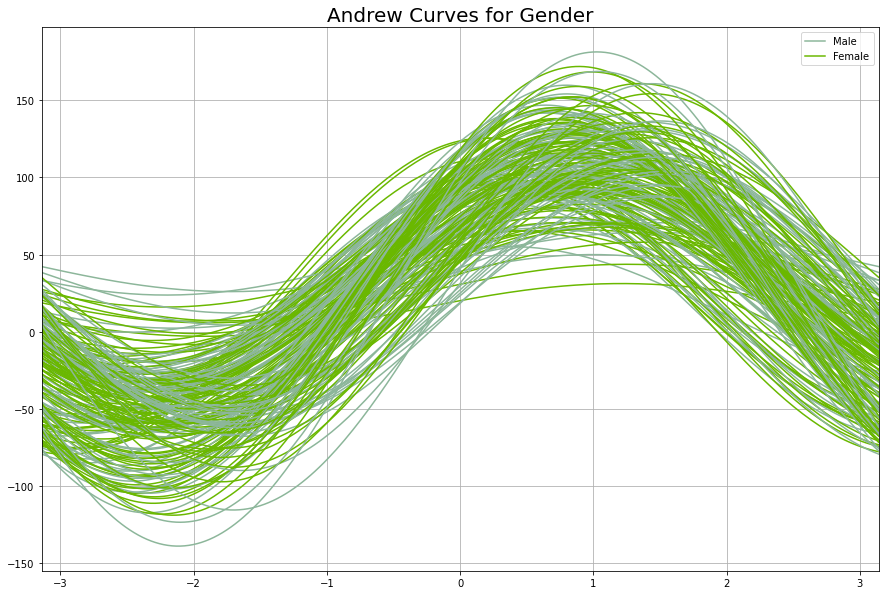

In [29]:
plt.rcParams['figure.figsize'] = (15, 10)


pd.plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()


Bi variate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

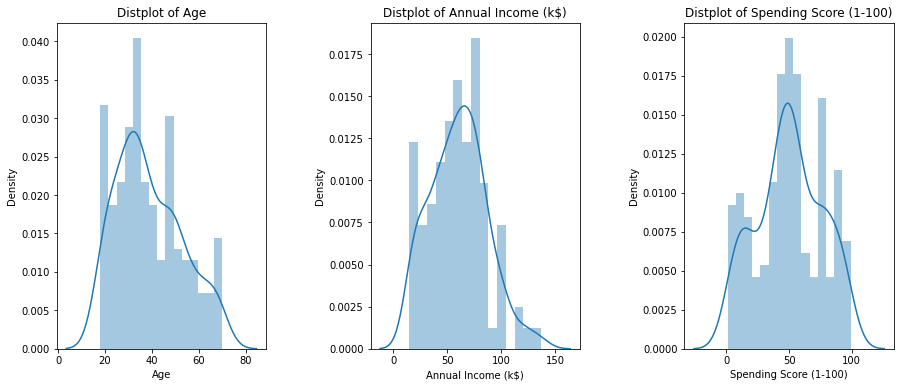

In [30]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

Multi Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

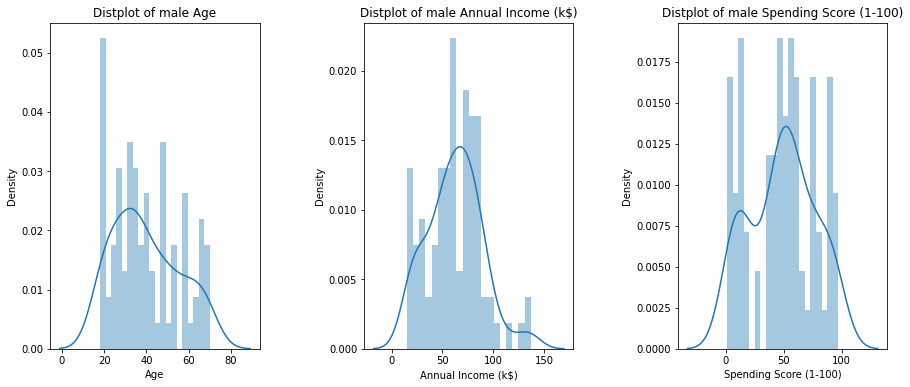

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

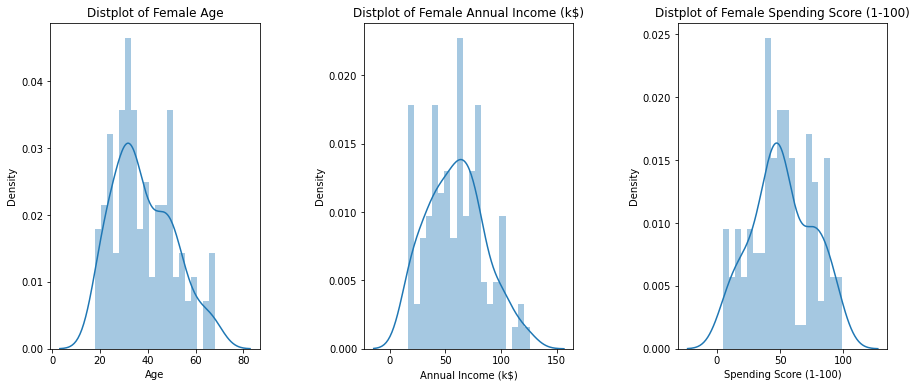

In [31]:
#Subsetting the dataframes for different gender groups
data_male = data[data['Gender'] == 'Male']
data_female = data[data['Gender'] == 'Female']

#Explore the Age , Income and Spending score for Males
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data_male[x] , bins = 20)
    plt.title('Distplot of male {}'.format(x))
plt.show()

#Explore the Age, Income and Spending score of Females
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data_female[x] , bins = 20)
    plt.title('Distplot of Female {}'.format(x))
plt.show()

In [32]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Perform descriptive statistics on the dataset

In [33]:
data[["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]].mean()


Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

In [34]:
data[["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]].min()

Age                       18
Annual Income (k$)        15
Spending Score (1-100)     1
dtype: int64

In [35]:
data[["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]].median()

Age                       36.0
Annual Income (k$)        61.5
Spending Score (1-100)    50.0
dtype: float64

In [36]:
data[["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]].std()

Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [37]:
data[["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]].var()

Age                       195.133166
Annual Income (k$)        689.835578
Spending Score (1-100)    666.854271
dtype: float64

In [38]:
data[["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]].mode()

,Age,Annual Income (k$),Spending Score (1-100)
0,32.0,54,42.0
1,NaN,78,NaN


In [39]:
data[["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]].min()

Age                       18
Annual Income (k$)        15
Spending Score (1-100)     1
dtype: int64

In [40]:
data[["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]].max()

Age                        70
Annual Income (k$)        137
Spending Score (1-100)     99
dtype: int64

In [41]:
data[["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]].skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

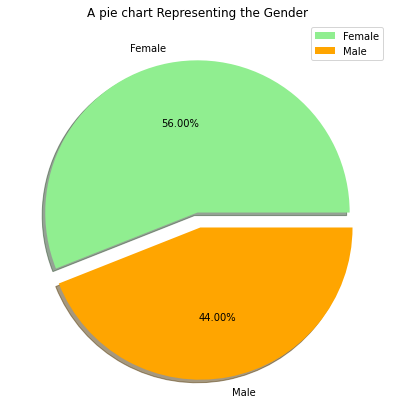

In [42]:
labels = ['Female', 'Male']
size = [112, 88]
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender')
plt.axis('off')
plt.legend()
plt.show()


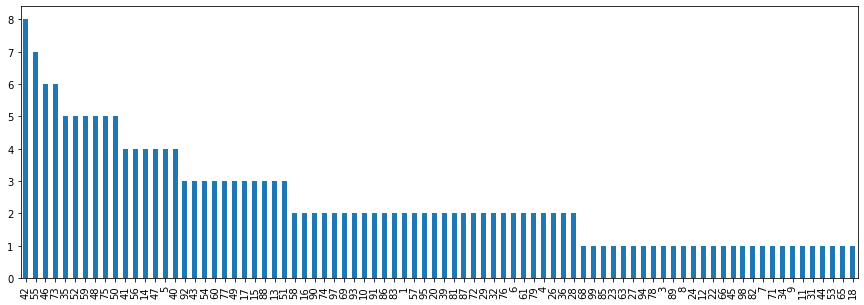

In [43]:
data['Spending Score (1-100)'].value_counts().plot.bar(figsize = (15, 5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


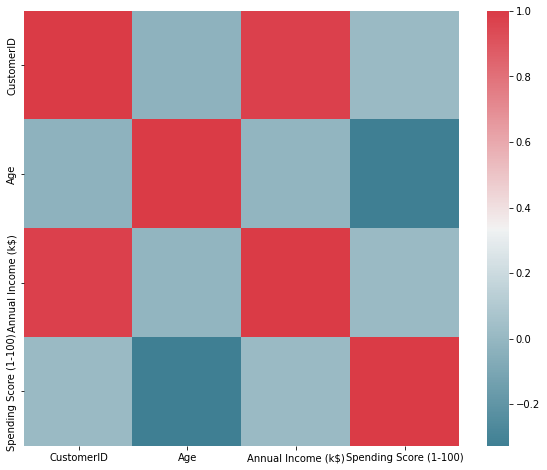

In [44]:
fig, axis = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True, ax = axis)

# One hot encoding

In [45]:
gender = data['Gender']
newdf = scaled_features.join(gender)

newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

newdf = newdf.drop(['Gender_Male'],axis=1)

newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


## Check for missing values and deal with them
     There is 0 missing values

In [46]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Find the outliers and replace them outliers

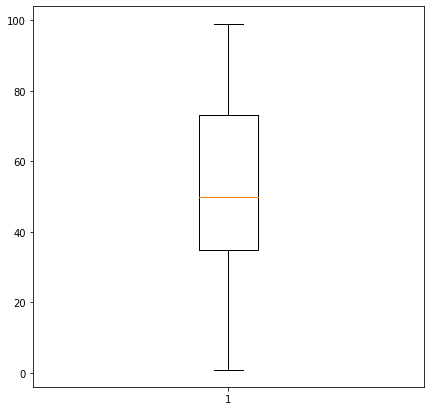

In [47]:
plt.boxplot(data["Spending Score (1-100)"])
plt.show()

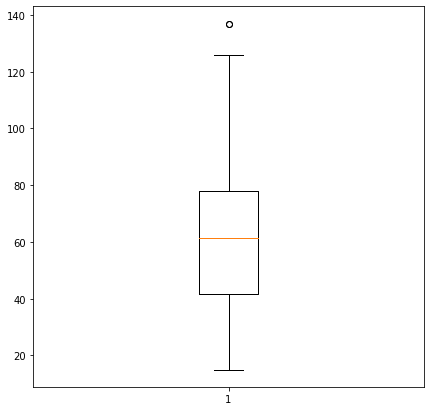

In [48]:
plt.boxplot(data["Annual Income (k$)"])
plt.show()

# Check for Categorical columns and perform encoding.

In [49]:
from scipy import stats
z= np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
print(z)

     CustomerID       Age  Annual Income (k$)  Spending Score (1-100)
0      1.723412  1.424569            1.738999                0.434801
1      1.706091  1.281035            1.738999                1.195704
2      1.688771  1.352802            1.700830                1.715913
3      1.671450  1.137502            1.700830                1.040418
4      1.654129  0.563369            1.662660                0.395980
..          ...       ...                 ...                     ...
195    1.654129  0.276302            2.268791                1.118061
196    1.671450  0.441365            2.497807                0.861839
197    1.688771  0.491602            2.497807                0.923953
198    1.706091  0.491602            2.917671                1.250054
199    1.723412  0.635135            2.917671                1.273347

[200 rows x 4 columns]


In [50]:
data_o = data[(z < 3).all(axis=1)]


In [51]:
low_cardinality_cols = [cname for cname in data_o.columns if
                        data_o[cname].nunique() < 10 and 
                       data_o[cname].dtype == "object"]
numeric_cols = [cname for cname in data_o.columns if
                                 data_o[cname].dtype in ['int64','float64']]

my_cols = low_cardinality_cols + numeric_cols
data_predictors = data_o[my_cols]

In [52]:
print("Shape of Mall_customers with outliers: "+ str(data.shape) , 
      "Shape of Mall_customers without outliers: " + str(data_o.shape))

Shape of Mall_customers with outliers: (200, 5) Shape of Mall_customers without outliers: (200, 5)


In [53]:
data_encoded_predictors = pd.get_dummies(data_predictors)

# Split the data into dependent and independent variables.

In [54]:
x= data.iloc[:,3:-1]
y=data.iloc[:,-1]
x.head()

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17


# Scale the independent variables

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0
0,-0.448039
1,0.341733
2,1.432370
3,-0.034349
4,0.642599


In [56]:
x= data.iloc[:,3:-1]
y=data.iloc[:,-1]
x.head()

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17


In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 1)
(150,)
(50, 1)
(50,)


# Perform any of the clustering algorithms


In [58]:
X = data.iloc[:,[3,4]].values
X[:,0]

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [59]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state = 0)

# return label for each data points based on there cluster
y = kmeans.fit_predict(X)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30259.65720728547, 25095.70320999756, 21830.041978049434, 20736.679938924128]


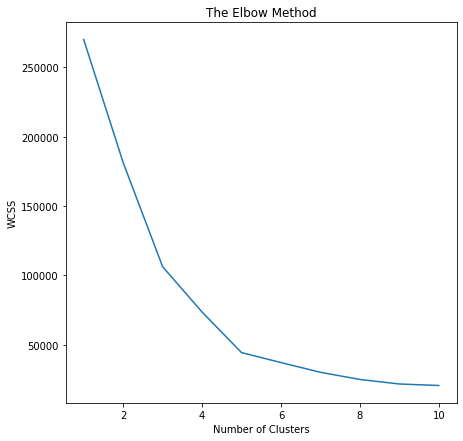

In [60]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
x = data.iloc[:, [3, 4]].values

print(x.shape)

(200, 2)


# Building the clustering model
---



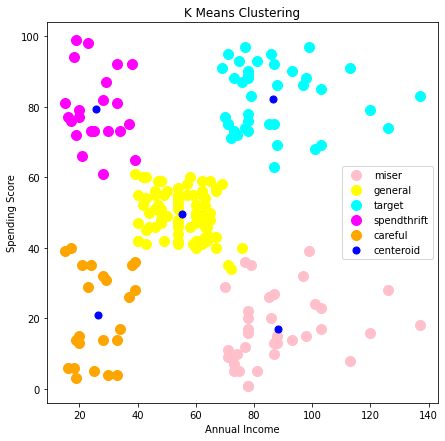

In [62]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

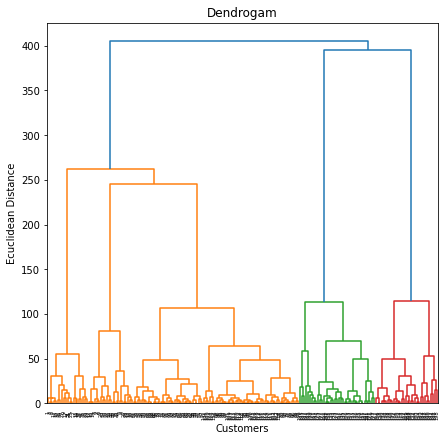

In [63]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

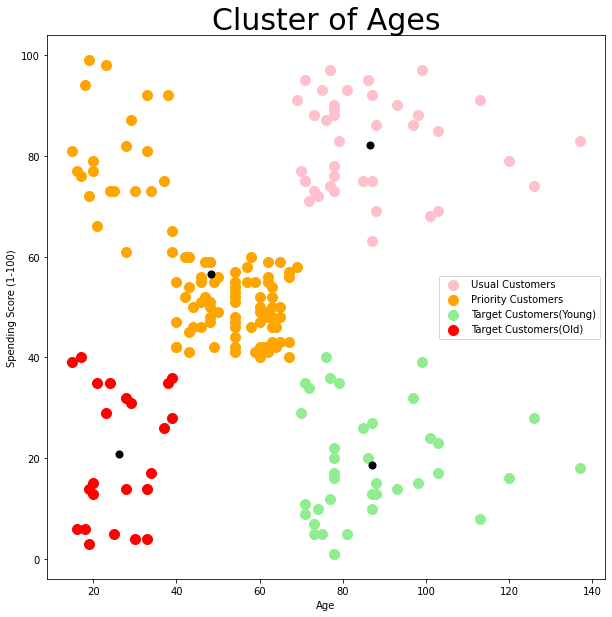

In [64]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Train the Model

In [65]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state = 0)

# return label for each data points based on there cluster
y = kmeans.fit_predict(X)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

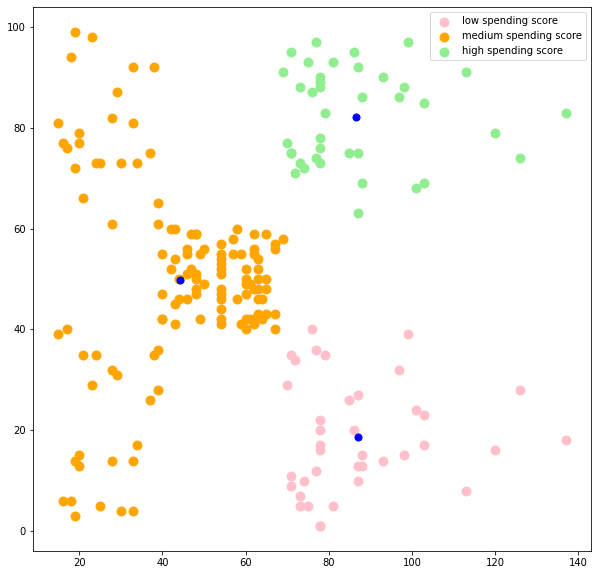

In [66]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 80, c = 'pink', label = 'low spending score')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 80, c = 'orange', label = 'medium spending score')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 80, c = 'lightgreen', label = 'high spending score')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'blue')
plt.legend()
plt.show()

# Test the Model

In [67]:
import numpy as np
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)
x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x
train_x = x[:70]
train_y = y[:70]

test_x = x[90:]
test_y = y[90:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8375396276474784
